In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## PLOT

In [2]:
x=np.arange(0,13,1)
y=x**2
y2=x**2.2
x2=np.arange(9,23,1)
y3=x2*2.2

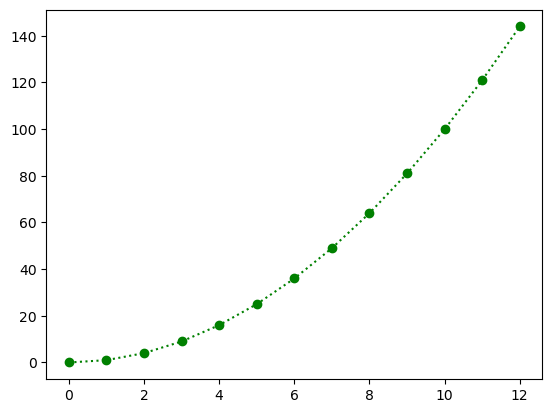

In [3]:
fig, ax = plt.subplots()
# Estilo directo 'g' de green 'o' de puntos y ':' para la linea punteada
ax.plot(x,y,'go:')
plt.show()

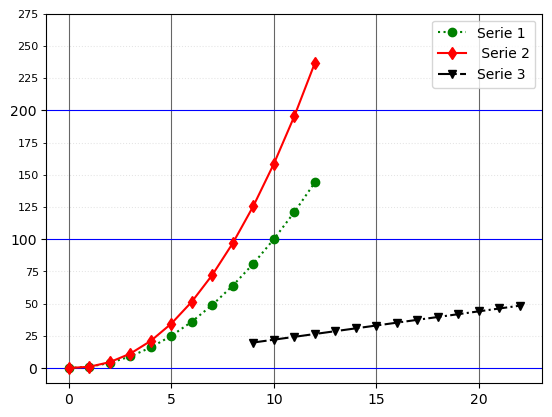

In [4]:
fig, ax = plt.subplots()
# Es podible graficar varias lineas en una misma sentencia ordenando "ejex", "ejey", "tipo".
ax.plot(x,y,'go:', x,y2,'rd-',x2,y3,'kv-.')
# Leyenda
plt.legend(['Serie 1',' Serie 2','Serie 3'])
# Ticks
ticksyM = np.arange(0,300,100)
ticksym = np.arange(0,300,25)
# Los ticks se definen por (ubicación), (label)
ax.set_yticks((ticksyM),(ticksyM))
ax.set_yticks((ticksym),(ticksym), minor=True)
ax.tick_params(axis='y', which='minor', labelsize=8)
# Grilla
ax.grid(axis='x', which='major', color='k', alpha=0.6)
ax.grid(axis='y', which='major', color='b')
ax.grid(axis='y', which='minor', color='k', alpha=0.1, linestyle=':')
plt.show()

## BAR

In [5]:
# Lectura del archivo, selección de columnas, identificación del índice, y transformación a Timestamp
puestos=pd.read_csv('puestos-sector-trim.csv', usecols=['indice_tiempo','construccion','textiles_cuero','hoteles_restaurantes'], index_col=0, parse_dates=True)
# Reducción a valores anuales descartando año 2015 incompleto, copia a otra variable.
graf=puestos[puestos.index<pd.Timestamp('2015-01-01')].resample('Y').sum().copy()
# Cambio formato de fecha a solo año
graf.index=graf.index.year

In [6]:
graf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2006 to 2014
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   textiles_cuero        9 non-null      float64
 1   construccion          9 non-null      float64
 2   hoteles_restaurantes  9 non-null      float64
dtypes: float64(3)
memory usage: 252.0 bytes


In [7]:
# Definición de etiquetas
etiqueta = graf.index
# Separo las columnas
txtl = graf.textiles_cuero
cnst = graf.construccion
htlr = graf.hoteles_restaurantes
# Defino eje x, cantidad de grupos de columnas
x=np.arange(len(etiqueta))
# Ancho de columna, es un porcentaje al ancho total de cada X
ancho_col = 0.25

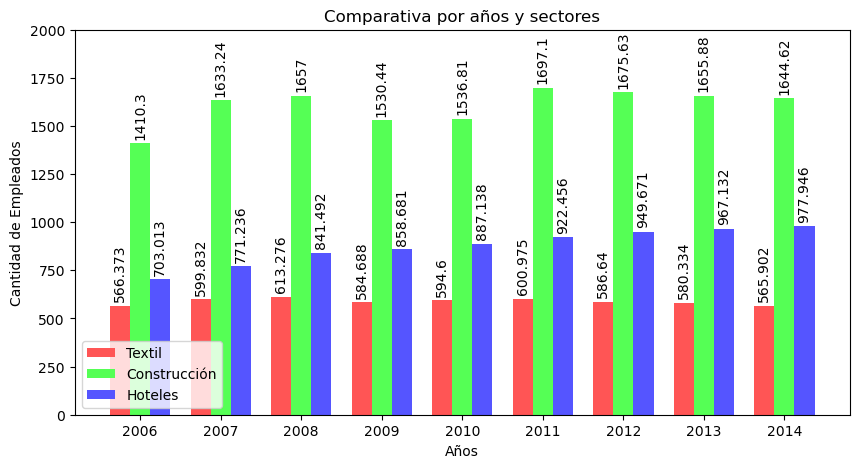

In [8]:
# Definición del tamaño del gráfico
fig, ax = plt.subplots(figsize=(10,5))
# Definición de cada uno de las columnas, con la ubicación con respecto al centro cada X, la serie, en ancho de la columna, etiqueta y color.
t= ax.bar(x-ancho_col, txtl, ancho_col, label='Textil', color='#ff5555')
c= ax.bar(x, cnst, ancho_col, label='Construcción', color='#55ff55')
h= ax.bar(x+ancho_col, htlr, ancho_col, label='Hoteles', color='#5555ff')
# Definición de Etiquetas
ax.set_title("Comparativa por años y sectores")
ax.set_ylabel('Cantidad de Empleados')
ax.set_xlabel('Años')
# Definición de los ticks
ax.set_xticks(x, etiqueta)
# Leyenda
ax.legend(loc=('lower left'))
# Valor de cada barra
ax.bar_label(t,padding=3,rotation=90)
ax.bar_label(c,padding=3,rotation=90)
ax.bar_label(h,padding=3,rotation=90)
ax.set_ylim(0,2000)
plt.show()

## Cajas

In [10]:
graf

,textiles_cuero,construccion,hoteles_restaurantes
indice_tiempo,,,
2006,566.373,1410.300,703.013
2007,599.832,1633.238,771.236
2008,613.276,1656.996,841.492
2009,584.688,1530.439,858.681
2010,594.600,1536.807,887.138
2011,600.975,1697.099,922.456
2012,586.640,1675.633,949.671
2013,580.334,1655.881,967.132
2014,565.902,1644.625,977.946


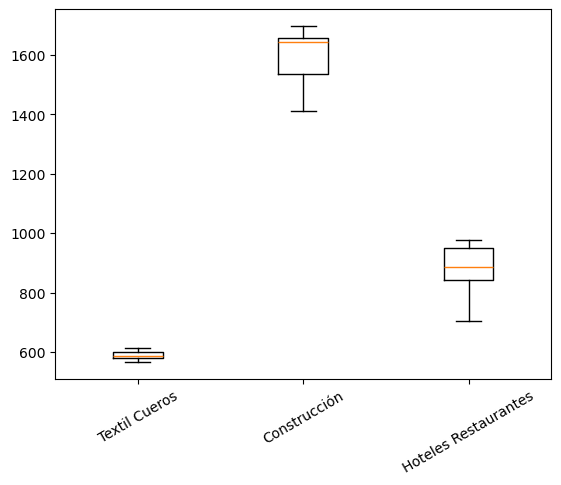

In [66]:
fig, ax = plt.subplots()
# Por Defecto
ax.boxplot(graf
# Horizontal, ver xtickslabels
    ,#vert=False
# Muestra el promedio
    #,showmeans = True
# Muestra Mueca
    #,notch=True
# Muestra el promedio como línea
    #,meanline = True
# Activa edición de colores y formatos
    #,patch_artist=True
# Color de fondo
    #,boxprops = dict(facecolor = "yellow")
# Edita linea promedio
    #,medianprops = dict(color = "red", linewidth = 1.5)
# Edita linea primer y ultimo cuartil
    #,whiskerprops = dict(color = "orange")
# Edita inicio del primer y fin del ultimo cuartil
    #,capprops = dict(color = "black", linewidth = 4)
    )
ax.set_xticklabels(['Textil Cueros','Construcción','Hoteles Restaurantes'], rotation=30)
plt.show()
